In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

In [2]:
train.shape, test.shape, submission.shape

((595212, 58), (892816, 57), (892816, 1))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

In [4]:
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

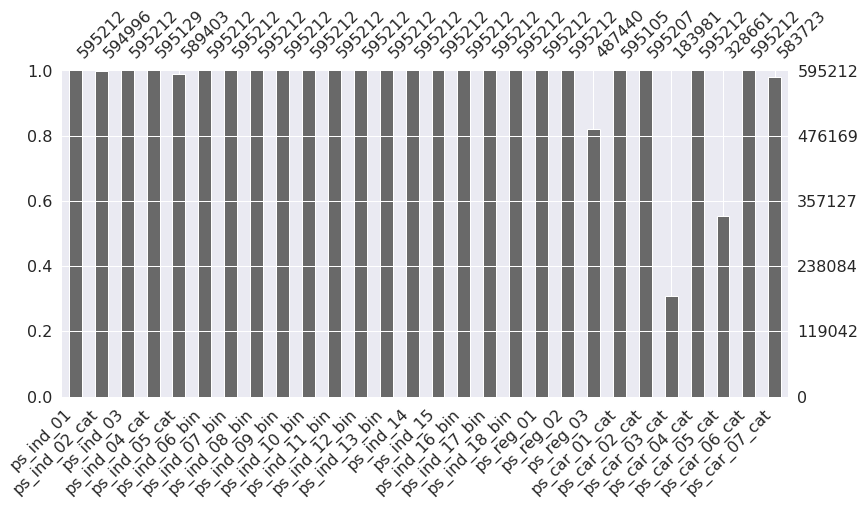

In [5]:
# 훈련 데이터 복사본에서 -1을 np.NaN로 변환
train_copy = train.copy().replace(-1, np.NaN)

# 결측값 시각화(처음 28개만)
msno.bar(train_copy.iloc[:, 1:29], figsize=(13, 6));

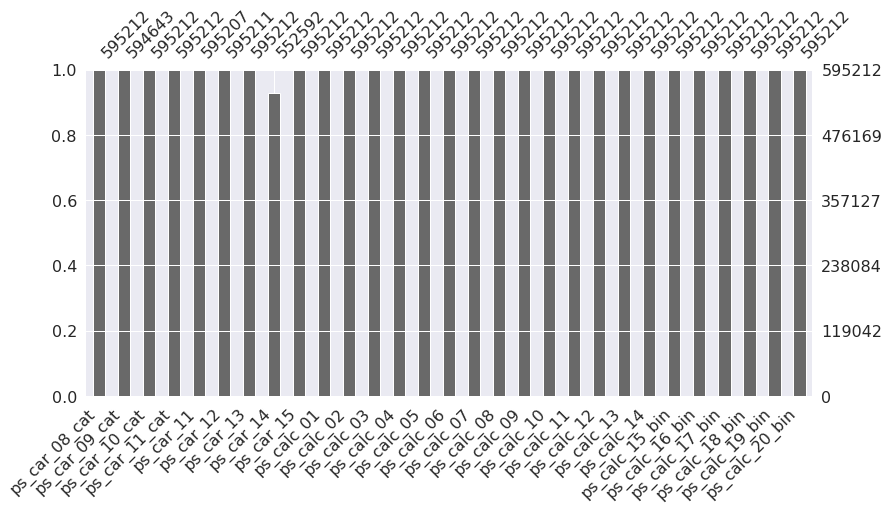

In [6]:
msno.bar(train_copy.iloc[:, 29:], figsize=(13, 6));

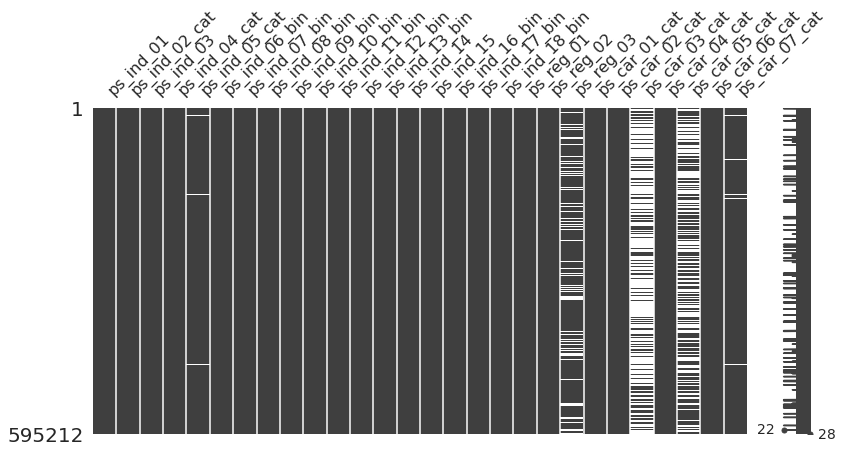

In [7]:
msno.matrix(train_copy.iloc[:, 1:29], figsize=(13, 6));
# 우측 막대 22(결측치 없는 열), 28(전체열)

피쳐 요약표

In [8]:
def resumetable(df):
    print(f'데이터 세트 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1 개수
    summary['고유값 개수'] = df.nunique().values     
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col =='target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtypes == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtypes == int:
            summary.loc[col, '데이터 종류'] = '순서형'
            
    return summary

In [9]:
summary = resumetable(train)
summary

데이터 세트 형상 : (595212, 58)


,데이터 타입,결측값 개수,고유값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [10]:
summary[summary['데이터 종류'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [11]:
summary['데이터 종류'].value_counts()

이진형    18
순서형    16
명목형    14
연속형    10
Name: 데이터 종류, dtype: int64

In [12]:
summary[summary['데이터 타입'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

In [13]:
summary['데이터 타입'].value_counts()

int64      48
float64    10
Name: 데이터 타입, dtype: int64

### 시각화

타깃값 분포

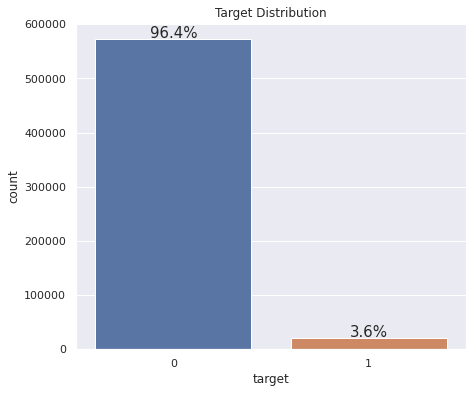

In [14]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(left_coord + width/2.0,     # x축 위치
                height + total_size*0.001,  # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center')                # 가운데 정렬
        
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution');

binary feature

In [15]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12, 18)):
    mpl.rc('font', size=9)
    plt.figure(figsize=size)
    
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

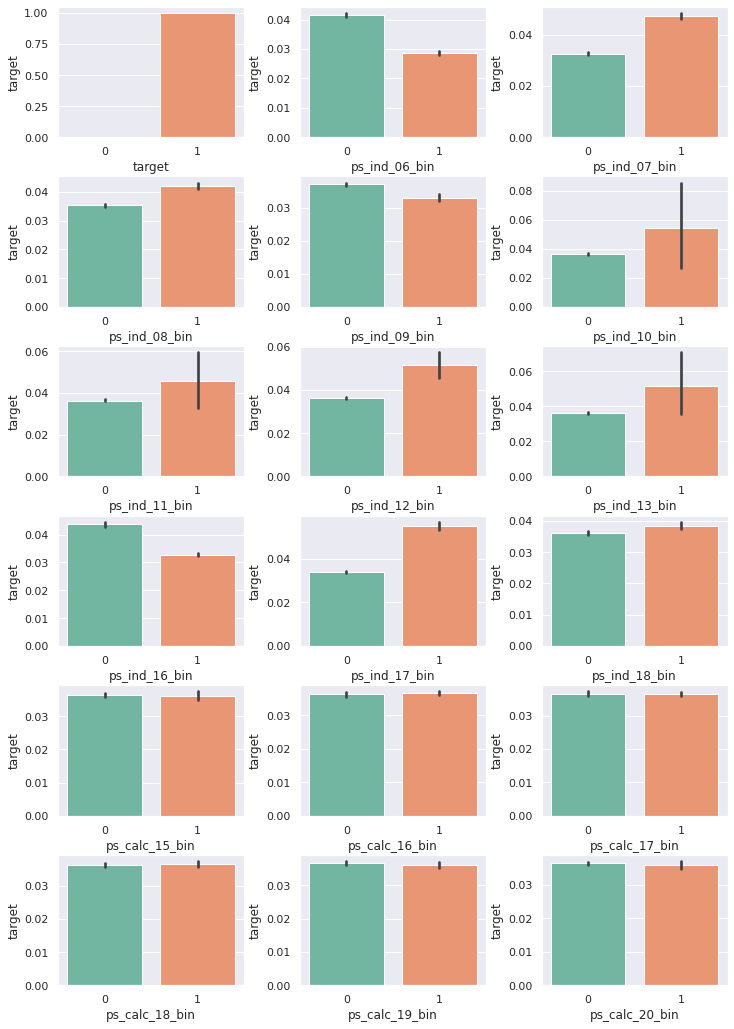

In [16]:
# binary feature column 만 가져와서 저장.
bin_features = summary[summary['데이터 종류'] == '이진형'].index # 이진 피처

# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3)

nominal feature

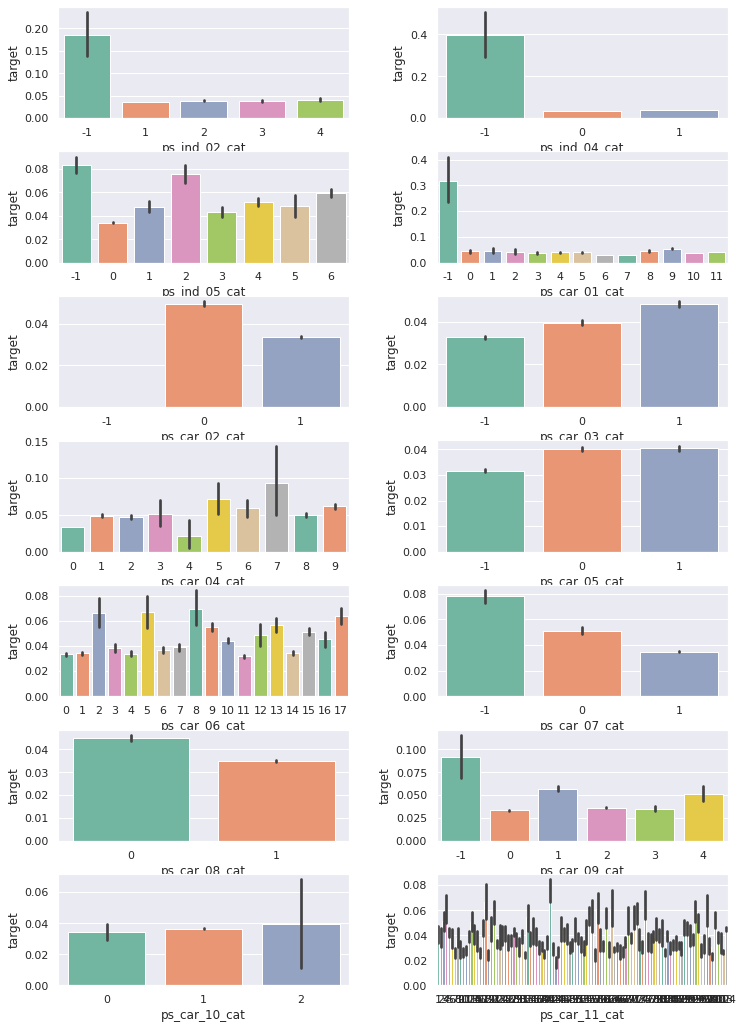

In [17]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index

plot_target_ratio_by_features(train, nom_features, 7, 2)

ordinal feature

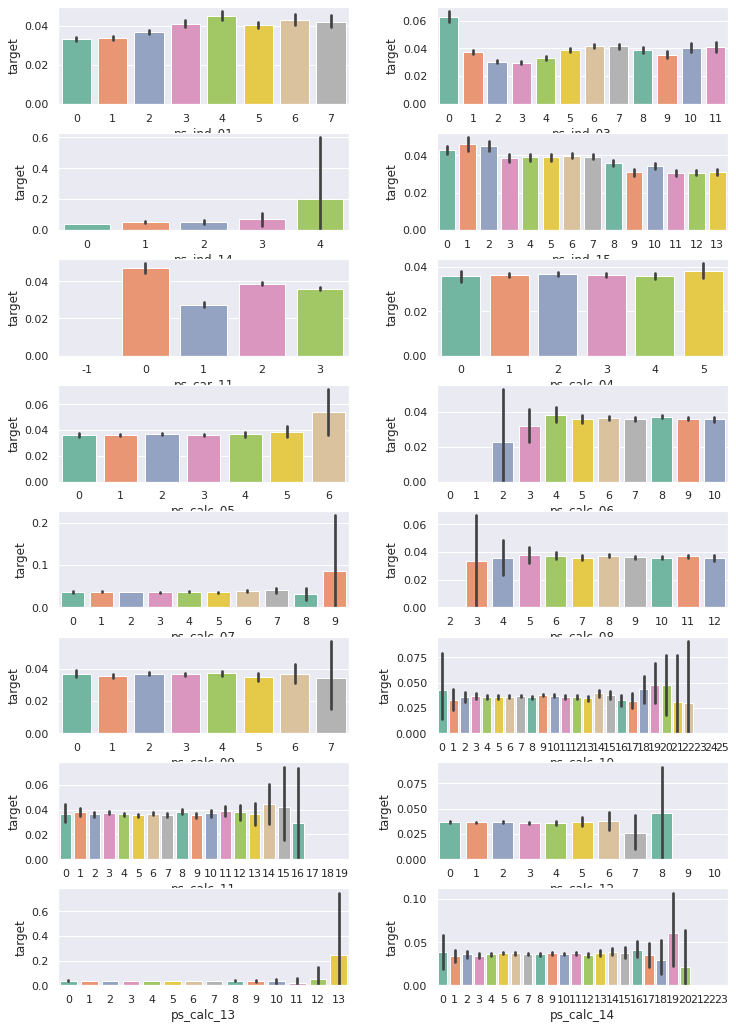

In [18]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index

plot_target_ratio_by_features(train, ord_features, 8, 2)

continuous feature

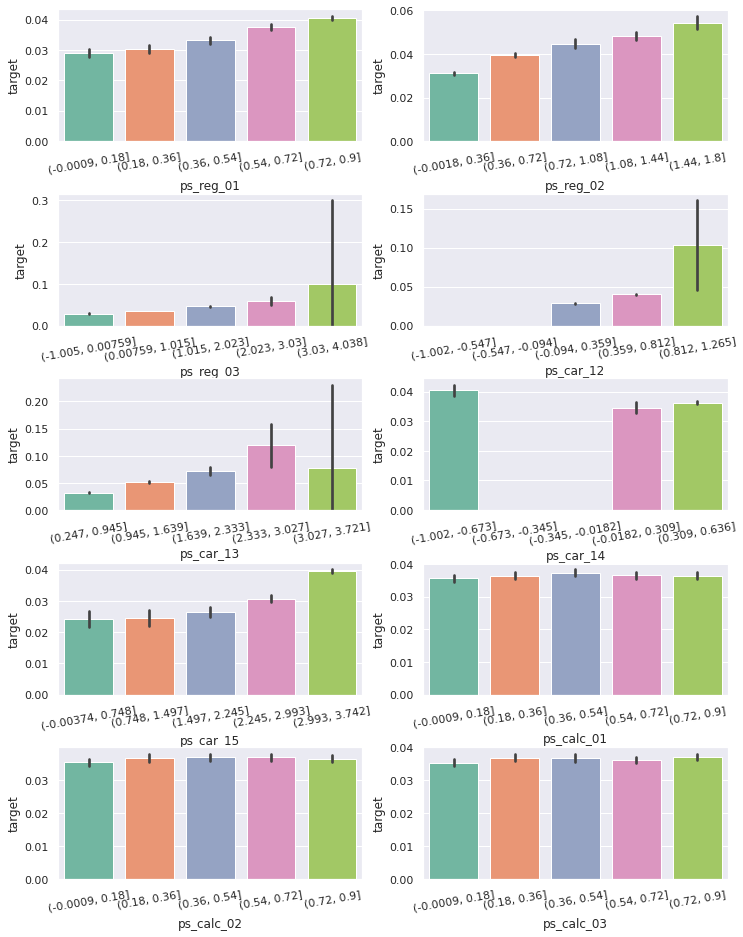

In [19]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index

plt.figure(figsize=(12, 16))                # Figure 크기 설정
grid = gridspec.GridSpec(5, 2)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.4) # 서브플롯 간 여백 설정

for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나누기
    train[cont_feature] = pd.cut(train[cont_feature], 5)
    
    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10)   


In [20]:
train_copy = train_copy.dropna() # np.NaN 값 삭제

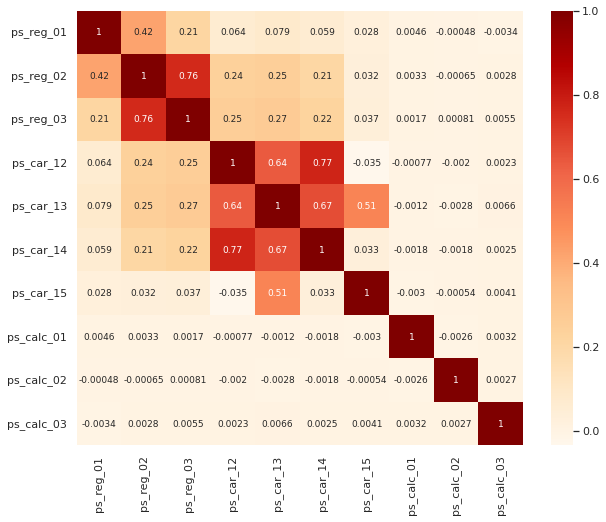

In [21]:
plt.figure(figsize=(10,8))
cont_corr = train_copy[cont_features].corr()     # 연속형 피처 간 상관관계
sns.heatmap(cont_corr, annot=True, cmap='OrRd'); # 히트맵 그리기